<h1 style="text-align: center;">CS3802 Machine Learning Algorithms Lab : Ex 7</h1>
<h2 style="text-align: center;">21011102079</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data  = pd.read_csv(r"D:/snu/academic/sem6/ML_Lab/Lab7/data.csv")

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
k = 5

In [7]:
kmeans_sklearn = KMeans(n_clusters=k)
labels_sklearn = kmeans_sklearn.fit_predict(X)
centroids_sklearn = kmeans_sklearn.cluster_centers_

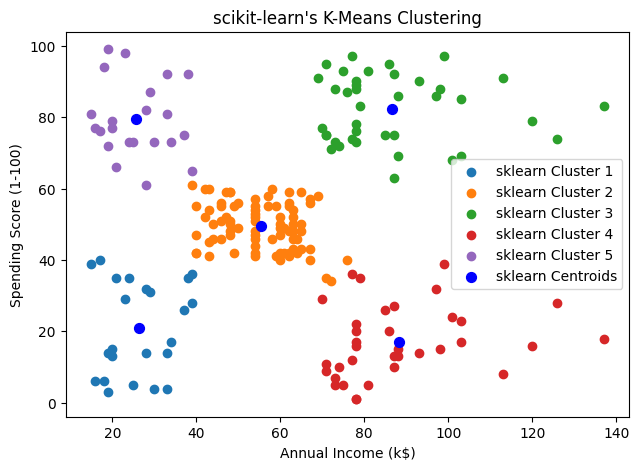

In [8]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 2)
for cluster_label in range(k):
    cluster_points = X[labels_sklearn == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'sklearn Cluster {cluster_label + 1}')


plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='.', s=200, c='blue', label='sklearn Centroids')
plt.title("scikit-learn's K-Means Clustering")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

In [9]:
df  = pd.read_csv(r"D:/snu/academic/sem6/ML_Lab/Lab7/data.csv")
X2 = df['Annual Income (k$)'].values
Y2 = df['Spending Score (1-100)'].values

In [10]:
clusters = {'c' + str(i + 1): [] for i in range(k)}

In [11]:
centroid_indices = np.random.choice(len(X2), k, replace=False)
centroids = [(X2[i], Y2[i]) for i in centroid_indices]

In [12]:
for cluster_name in clusters:
    clusters[cluster_name].append(centroids.pop(0))

In [13]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [14]:
max_iterations = 1000

for iteration in range(max_iterations):
    for i in range(len(X2)):
        point = (X2[i], Y2[i])
        closest_cluster = min(clusters.keys(), key=lambda cluster: distance(point, clusters[cluster][0]))
        clusters[closest_cluster].append(point)
    
    centroids_changed = False
    for cluster_name, cluster_points in clusters.items():
        if len(cluster_points) > 1:  
            centroid_x = np.mean([point[0] for point in cluster_points[1:]])
            centroid_y = np.mean([point[1] for point in cluster_points[1:]])

            if (centroid_x, centroid_y) != clusters[cluster_name][0]:
                centroids_changed = True

                clusters[cluster_name][0] = (centroid_x, centroid_y)
            else:
                break
    

    if not centroids_changed:
        print("Converged after", iteration + 1, "iterations.")
        break

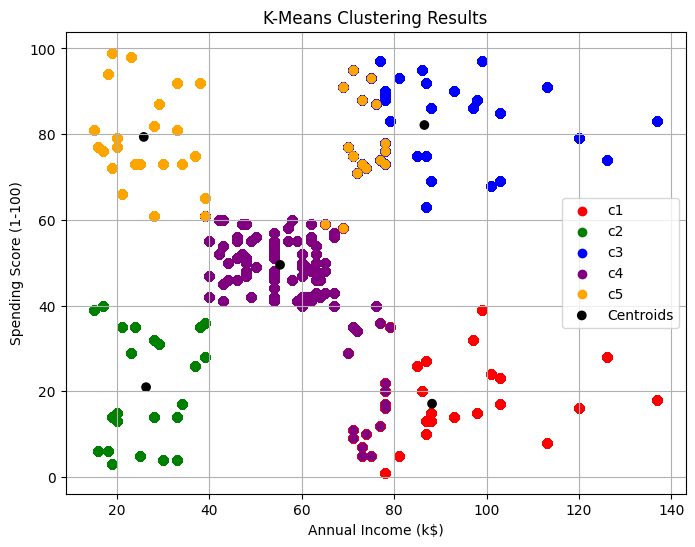

In [15]:
colors = ['red', 'green', 'blue', 'purple', 'orange']  


cluster_data = {}
for cluster_name, points in clusters.items():
    cluster_data[cluster_name] = np.array(points[1:]) 

plt.figure(figsize=(8, 6))


for cluster_name, data in cluster_data.items():
    plt.scatter(data[:, 0], data[:, 1], label=cluster_name, c=colors[int(cluster_name[-1]) - 1])

centroid_colors = ['black'] * k
centroid_data = [cluster[0] for cluster in clusters.values()]
plt.scatter([point[0] for point in centroid_data], [point[1] for point in centroid_data], marker='o', c=centroid_colors, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

1. Initial Centroid Selection:

My CodeM mine randomly choose k data points as initial centroids. This introduces randomness into the clustering process. Different random selections can lead to different assignments of data points to clusters, resulting in potentially different final centroids and cluster configuration
s.
scikit-learn KMeans: scikit-learn employs more sophisticated techniques for centroid initialization, often using methods like k-means++ or seeding. These techniques aim to spread out the initial centroids more evenly, leading to (generally) more consistent clustering resul
ts.
2. Deterministic vs. Stochastic Updates:

My Mode: mine iterate through all data points in each step, assigning them to the closest centroid. This is a deterministic approach, meaning the order in which data points are processed doesn't affect the final outcome (assuming converg
ence).
scikit-learn KMeans: scikit-learn's KMeans might use a minibatch approach, processing data points in small batches instead of all at once. This can introduce a slight element of stochasticity (randomness) into the update process, potentially leading to minor variations in the final clusters in some cases.


Due to the random selection of initial centroids, My implementation can produce different cluster assignments and final centroids on different runs. Here's a breakdown:

Different Starting Points: The random selection of initial centroids leads to different starting configurations for the clusters. Data points might be initially closer to different centroids on different runs, leading to a snowball effect of assignments throughout the iterations.

Early Assignments Can Influence Later Ones: Since mine process data points sequentially, the assignment of an early data point can influence the assignment of later points. Depending on the order, a data point might be closer to a different centroid due to the evolving cluster shapes, leading to different cluster compositions.compositions.